In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from ATZE.Scenario_Analysis.create_time_evolution_adapted import create_time_normalization_xr, convert_xr_to_nc, plot_time_norm
lee_p = r"C:\Users\atzeh\OneDrive\Documenten\TU\MASTER\Thesis\Lee_data.xlsx"


In [2]:
emissions = [
    [1990, 549.6,	0.65,	0.0050,	0.1983,	203.4,	1.68E+10],
    [1991, 531.5,	0.63,	0.0048,	0.1918,	196.7,	1.66E+10],
    [1992, 532.8,	0.63,	0.0048,	0.1922,	197.2,	1.83E+10],
    [1993, 535.7,	0.64,	0.0048,	0.1932,	198.2,	2.00E+10],
    [1994, 561.2,	0.67,	0.0051,	0.2025,	207.7,	2.13E+10],
    [1995, 574.9,	0.70,	0.0052,	0.2074,	212.7,	2.27E+10],
    [1996, 600.9,	0.73,	0.0054,	0.2168,	222.4,	2.40E+10],
    [1997, 619.2,	0.76,	0.0056,	0.2234,	229.2,	2.52E+10],
    [1998, 631.4,	0.78,	0.0057,	0.2278,	233.7,	2.62E+10],
    [1999, 651.8,	0.82,	0.0059,	0.2351,	241.2,	2.77E+10],
    [2000, 685.5,	0.87,	0.0062,	0.2473,	253.7,	3.03E+10],
    [2001, 659.4,	0.84,	0.0059,	0.2379,	244.0,	3.05E+10],
    [2002, 660.7,	0.84,	0.0060,	0.2384,	244.5,	2.97E+10],
    [2003, 660.3,	0.85,	0.0060,	0.2382,	244.4,	3.10E+10],
    [2004, 701.9,	0.91,	0.0063,	0.2532,	259.7,	3.51E+10],
    [2005, 736.4,	0.96,	0.0066,	0.2656,	272.5,	3.71E+10],
    [2006, 744.9,	0.98,	0.0067,	0.2687,	275.7,	3.87E+10],
    [2007, 766.6,	1.02,	0.0069,	0.2766,	283.7,	4.07E+10],
    [2008, 763.0,	1.03,	0.0069,	0.2753,	282.4,	4.17E+10],
    [2009, 723.6,	0.99,	0.0065,	0.2610,	267.8,	4.06E+10],
    [2010, 760.1,	1.05,	0.0069,	0.2742,	281.3,	4.47E+10],
    [2011, 782.7,	1.08,	0.0071,	0.2824,	289.6,	4.71E+10],
    [2012, 791.1,	1.10,	0.0071,	0.2854,	292.8,	4.83E+10],
    [2013, 813.6,	1.13,	0.0073,	0.2935,	301.1,	4.98E+10],
    [2014, 839.2,	1.16,	0.0076,	0.3028,	310.6,	5.18E+10],
    [2015, 885.1,	1.23,	0.0080,	0.3193,	327.5,	5.44E+10],
    [2016, 927.9,	1.29,	0.0084,	0.3347,	343.4,	5.74E+10],
    [2017, 982.6,	1.36,	0.0089,	0.3545,	363.6,	6.01E+10],
    [2018, 1033.7,	1.43,	0.0093,	0.3729,	382.6,	6.13E+10]]
columns = [
    "Year", "CO2", "NOx", "BC",
    "SO2", "H2O", "cont_dist"
]
# Create DataFrame
df = pd.DataFrame(emissions, columns=columns)

# Set 'Year' as index
# df.set_index("Year", inplace=True)

# Display the DataFrame
print(df)


    Year     CO2   NOx      BC     SO2    H2O     cont_dist
0   1990   549.6  0.65  0.0050  0.1983  203.4  1.680000e+10
1   1991   531.5  0.63  0.0048  0.1918  196.7  1.660000e+10
2   1992   532.8  0.63  0.0048  0.1922  197.2  1.830000e+10
3   1993   535.7  0.64  0.0048  0.1932  198.2  2.000000e+10
4   1994   561.2  0.67  0.0051  0.2025  207.7  2.130000e+10
5   1995   574.9  0.70  0.0052  0.2074  212.7  2.270000e+10
6   1996   600.9  0.73  0.0054  0.2168  222.4  2.400000e+10
7   1997   619.2  0.76  0.0056  0.2234  229.2  2.520000e+10
8   1998   631.4  0.78  0.0057  0.2278  233.7  2.620000e+10
9   1999   651.8  0.82  0.0059  0.2351  241.2  2.770000e+10
10  2000   685.5  0.87  0.0062  0.2473  253.7  3.030000e+10
11  2001   659.4  0.84  0.0059  0.2379  244.0  3.050000e+10
12  2002   660.7  0.84  0.0060  0.2384  244.5  2.970000e+10
13  2003   660.3  0.85  0.0060  0.2382  244.4  3.100000e+10
14  2004   701.9  0.91  0.0063  0.2532  259.7  3.510000e+10
15  2005   736.4  0.96  0.0066  0.2656  

In [3]:
emis = [  
    [1990, 173.9,	549.6,	14371,	1.17,	16754	,0.95,	12.90,	0.03,	1.2,	1231],
    [1991, 168.2,	531.5,	14262,	1.17,	16627	,0.95,	12.90,	0.03,	1.2,	1231],
    [1992, 168.6,	532.8,	15690,	1.17,	18291	,0.95,	12.90,	0.03,	1.2,	1231],
    [1993, 169.5,	535.7,	17118,	1.17,	19956	,0.95,	13.01,	0.03,	1.2,	1231],
    [1994, 177.6,	561.2,	18249,	1.17,	21275	,0.95,	13.12,	0.03,	1.2,	1231],
    [1995, 181.9,	574.9,	19470,	1.17,	22698	,0.95,	13.23,	0.03,	1.2,	1231],
    [1996, 190.2,	600.9,	20601,	1.17,	24016	,0.95,	13.34,	0.03,	1.2,	1231],
    [1997, 195.9,	619.2,	21630,	1.17,	25216	,0.95,	13.46,	0.03,	1.2,	1231],
    [1998, 199.8,	631.4,	22438,	1.17,	26158	,0.95,	13.57,	0.03,	1.2,	1231],
    [1999, 206.3,	651.8,	23742,	1.17,	27678	,0.95,	13.68,	0.03,	1.2,	1231],
    [2000, 216.9,	685.5,	25982,	1.17,	30289	,0.95,	13.80,	0.03,	1.2,	1231],
    [2001, 208.7,	659.4,	26157,	1.17,	30494	,0.95,	13.88,	0.03,	1.2,	1231],
    [2002, 209.1,	660.7,	25507,	1.17,	29735	,0.95,	13.96,	0.03,	1.2,	1231],
    [2003, 209.0,	660.3,	26560,	1.17,	30963	,0.95,	14.04,	0.03,	1.2,	1231],
    [2004, 222.1,	701.9,	30122,	1.17,	35117	,0.95,	14.12,	0.03,	1.2,	1231],
    [2005, 233.0,	736.4,	31857,	1.17,	37139	,0.95,	14.20,	0.03,	1.2,	1231],
    [2006, 235.7,	744.9,	33179,	1.17,	38680	,0.95,	14.38,	0.03,	1.2,	1231],
    [2007, 242.6,	766.6,	34935,	1.17,	40727	,0.95,	14.57,	0.03,	1.2,	1231],
    [2008, 241.5,	763.0,	35769,	1.17,	41699	,0.95,	14.76,	0.03,	1.2,	1231],
    [2009, 229.0,	723.6,	34868,	1.17,	40648	,0.95,	14.95,	0.03,	1.2,	1231],
    [2010, 240.5,	760.1,	38366,	1.17,	44727	,0.95,	15.14,	0.03,	1.2,	1231],
    [2011, 247.7,	782.7,	40441,	1.17,	47145	,0.95,	15.14,	0.03,	1.2,	1231],
    [2012, 250.4,	791.1,	41454,	1.17,	48326	,0.95,	15.14,	0.03,	1.2,	1231],
    [2013, 257.5,	813.6,	42740,	1.17,	49826	,0.95,	15.14,	0.03,	1.2,	1231],
    [2014, 265.6,	839.2,	44460,	1.17,	51832	,0.95,	15.14,	0.03,	1.2,	1231],
    [2015, 280.1,	885.1,	46704,	1.17,	54447	,0.95,	15.14,	0.03,	1.2,	1231],
    [2016, 293.6,	927.9,	49204,	1.17,	57361	,0.95,	15.14,	0.03,	1.2,	1231],
    [2017, 311.0,	982.6,	51588,	1.17,	60141	,0.95,	15.14,	0.03,	1.2,	1231],
    [2018, 327.1	,1033.7,	52611,	1.17,	61333,	0.95,	15.14,	0.03,	1.2,	1231]]

columns = [
    "Year", "Fuel", "CO2", "dist", "dist_fac", "dist_scaled", "civil_frac", "EI_NOx", "EI_BC",
    "EI_SO2", "EI_H2O"
]
# Create DataFrame
emis_df = pd.DataFrame(emis, columns=columns)

# Set 'Year' as index
# emis_df.set_index("Year", inplace=True)
emis_df['Fuel'] = emis_df['Fuel']* emis_df['civil_frac']

# Display the DataFrame
print(emis_df)


    Year     Fuel     CO2   dist  dist_fac  dist_scaled  civil_frac  EI_NOx  \
0   1990  165.205   549.6  14371      1.17        16754        0.95   12.90   
1   1991  159.790   531.5  14262      1.17        16627        0.95   12.90   
2   1992  160.170   532.8  15690      1.17        18291        0.95   12.90   
3   1993  161.025   535.7  17118      1.17        19956        0.95   13.01   
4   1994  168.720   561.2  18249      1.17        21275        0.95   13.12   
5   1995  172.805   574.9  19470      1.17        22698        0.95   13.23   
6   1996  180.690   600.9  20601      1.17        24016        0.95   13.34   
7   1997  186.105   619.2  21630      1.17        25216        0.95   13.46   
8   1998  189.810   631.4  22438      1.17        26158        0.95   13.57   
9   1999  195.985   651.8  23742      1.17        27678        0.95   13.68   
10  2000  206.055   685.5  25982      1.17        30289        0.95   13.80   
11  2001  198.265   659.4  26157      1.17        30

In [4]:
ERF = [    
    [2000, 21.77,	29.81,	-11.81,	-5.91,	-1.77,	12.17,	0.62,	-4.92,	1.31,	28.35],
    [2001, 22.41,	28.84,	-11.49,	-5.74,	-1.72,	11.69,	0.60,	-4.74,	1.26,	28.54],
    [2002, 23.02,	29.07,	-11.64,	-5.82,	-1.75,	11.69,	0.60,	-4.75,	1.27,	27.83],
    [2003, 23.61,	29.21,	-11.76,	-5.88,	-1.76,	11.66,	0.60,	-4.74,	1.27,	28.98],
    [2004, 24.27,	31.23,	-12.64,	-6.32,	-1.90,	12.36,	0.64,	-5.04,	1.35,	32.87],
    [2005, 24.97,	32.95,	-13.41,	-6.71,	-2.01,	12.92,	0.67,	-5.29,	1.41,	34.76],
    [2006, 25.66,	33.77,	-13.81,	-6.90,	-2.07,	13.14,	0.68,	-5.35,	1.43,	36.20],
    [2007, 26.39,	35.20,	-14.46,	-7.23,	-2.17,	13.58,	0.70,	-5.51,	1.47,	38.12],
    [2008, 27.07,	35.48,	-14.64,	-7.32,	-2.20,	13.59,	0.69,	-5.48,	1.46,	39.03],
    [2009, 27.69,	34.08,	-14.13,	-7.06,	-2.12,	12.94,	0.66,	-5.20,	1.39,	38.04],
    [2010, 28.33,	36.27,	-15.10,	-7.55,	-2.26,	13.66,	0.69,	-5.46,	1.46,	41.86],
    [2011, 29.01,	37.34,	-15.81,	-7.90,	-2.37,	13.62,	0.71,	-5.62,	1.50,	44.13],
    [2012, 29.68,	37.75,	-16.04,	-8.02,	-2.41,	13.66,	0.72,	-5.68,	1.52,	45.23],
    [2013, 30.36,	38.82,	-16.56,	-8.28,	-2.48,	13.95,	0.74,	-5.84,	1.56,	46.63],
    [2014, 31.08,	40.04,	-17.15,	-8.57,	-2.57,	14.27,	0.76,	-6.03,	1.61,	48.51],
    [2015, 31.85,	42.23,	-18.15,	-9.08,	-2.72,	14.93,	0.80,	-6.36,	1.70,	50.96],
    [2016, 32.62,	44.27,	-18.98,	-9.49,	-2.85,	15.74,	0.84,	-6.66,	1.78,	53.69],
    [2017, 33.46	,46.88	,-20.10	,-10.05,	-3.02,	16.67,	0.89,	-7.06,	1.88,	56.29],
    [2018, 34.33	,49.32	,-21.15	,-10.57,	-3.17,	17.54,	0.94,	-7.42,	1.98,	57.40]]

columns = [
    "Year", "CO2", "O3_short", "CH4",
    "O3_long", "SWV", "net_NOx", "BC", "SO4", "H2O", "cont_dist"
]

# Create DataFrame
ERF_df = pd.DataFrame(ERF, columns=columns)

# Set 'Year' as index
# ERF_df.set_index("Year", inplace=True)

# Display the DataFrame
print(ERF_df)

    Year    CO2  O3_short    CH4  O3_long   SWV  net_NOx    BC   SO4   H2O  \
0   2000  21.77     29.81 -11.81    -5.91 -1.77    12.17  0.62 -4.92  1.31   
1   2001  22.41     28.84 -11.49    -5.74 -1.72    11.69  0.60 -4.74  1.26   
2   2002  23.02     29.07 -11.64    -5.82 -1.75    11.69  0.60 -4.75  1.27   
3   2003  23.61     29.21 -11.76    -5.88 -1.76    11.66  0.60 -4.74  1.27   
4   2004  24.27     31.23 -12.64    -6.32 -1.90    12.36  0.64 -5.04  1.35   
5   2005  24.97     32.95 -13.41    -6.71 -2.01    12.92  0.67 -5.29  1.41   
6   2006  25.66     33.77 -13.81    -6.90 -2.07    13.14  0.68 -5.35  1.43   
7   2007  26.39     35.20 -14.46    -7.23 -2.17    13.58  0.70 -5.51  1.47   
8   2008  27.07     35.48 -14.64    -7.32 -2.20    13.59  0.69 -5.48  1.46   
9   2009  27.69     34.08 -14.13    -7.06 -2.12    12.94  0.66 -5.20  1.39   
10  2010  28.33     36.27 -15.10    -7.55 -2.26    13.66  0.69 -5.46  1.46   
11  2011  29.01     37.34 -15.81    -7.90 -2.37    13.62  0.71 -

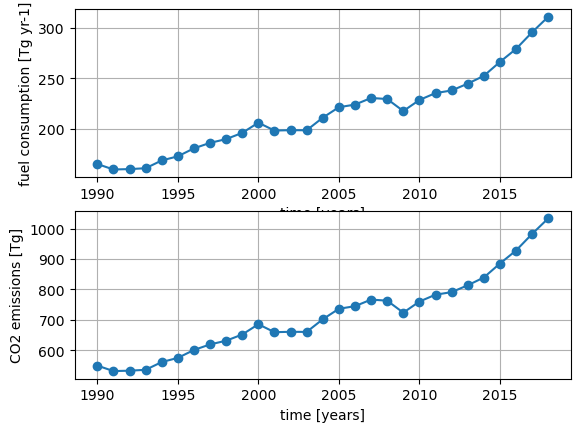

In [5]:
NORM_TIME = emis_df["Year"].values

FUEL_ARR = emis_df["Fuel"].values
EI_CO2_ARR = emis_df["CO2"]/ FUEL_ARR
EI_H2O_ARR = emis_df['EI_H2O']/1000 #kg/kg
EI_NOx_ARR = emis_df["EI_NOx"]/1000 #kgNOx/kgfuel
DIS_PER_FUEL_ARR = emis_df["dist_scaled"]*1e6/(FUEL_ARR*1e9) # km

norm_ds = create_time_normalization_xr(
    time_arr=NORM_TIME,
    fuel_arr=FUEL_ARR,
    ei_co2_arr=EI_CO2_ARR,
    ei_h2o_arr=EI_H2O_ARR,
    ei_nox_arr=EI_NOx_ARR,
    dis_per_fuel_arr=DIS_PER_FUEL_ARR,
)
convert_xr_to_nc(
    norm_ds, "Lee"+ "_evo", "../VandV/evolution/"
)
plot_time_norm(norm_ds)

In [6]:
print(173.9*12.9/1000, "Tg NOx")
print(173.9*12.9/1000/3.285, "Tg N")


2.24331 Tg NOx
0.6828949771689498 Tg N


read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 1990 and H = 10 are outside defined time range.
read_config ln. 532 in check_metrics_time WARNING: Last year in metrics time with t_0 = 1990 and H = 10 is earlier than last year in time range.
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 2000 and H = 20 are outside defined time range.
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 2010 and H = 100 are outside defined time range.
read_config ln. 185 in check_config ERROR: Configuration is not valid.
read_config ln. 380 in create_output_dir INFO: Overwrite existing output directory results_Lee/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and 

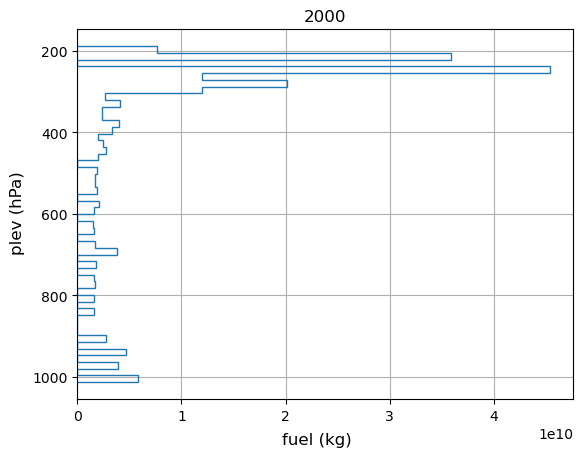

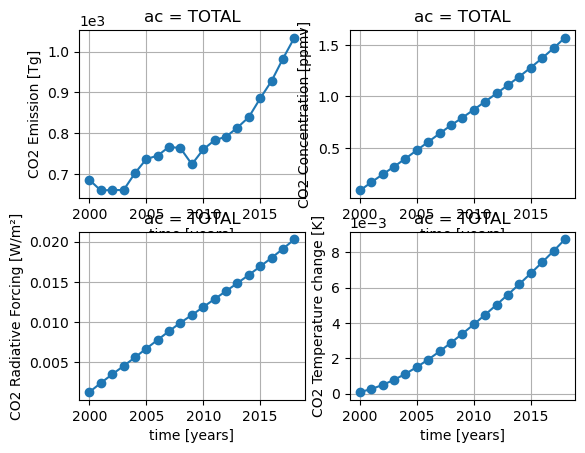

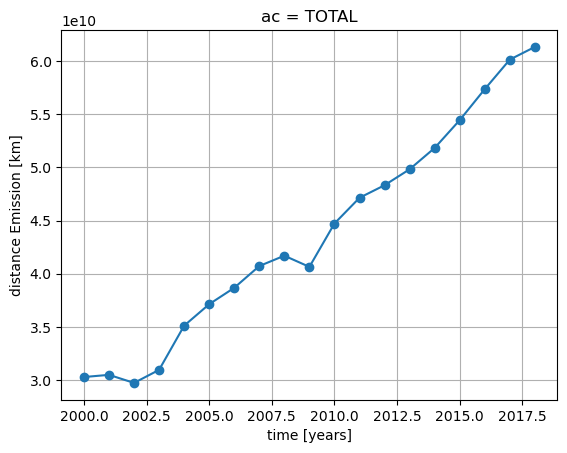

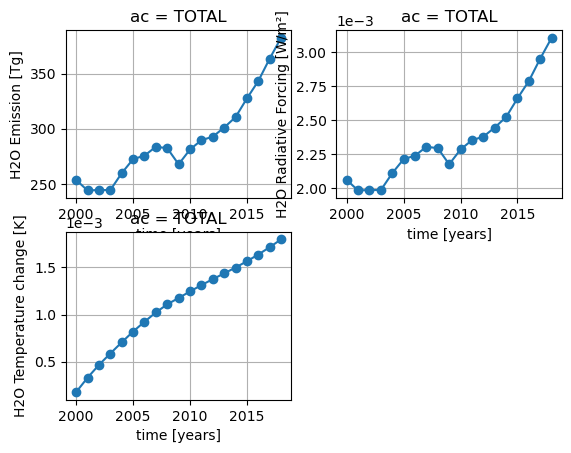

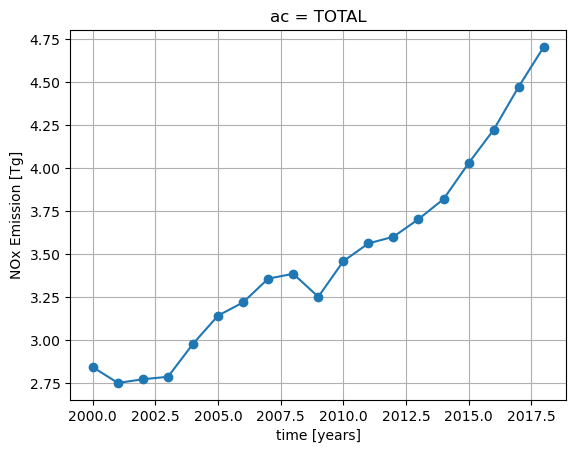

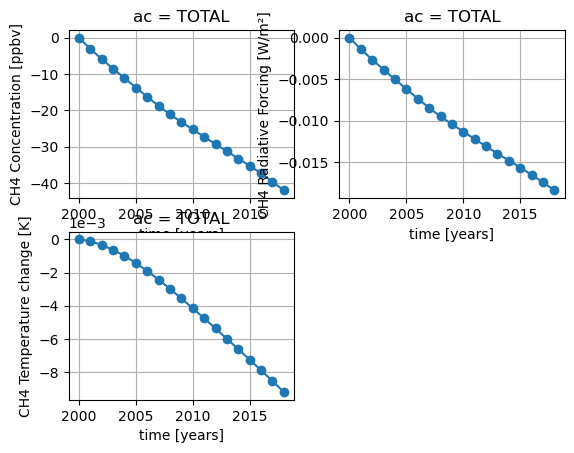

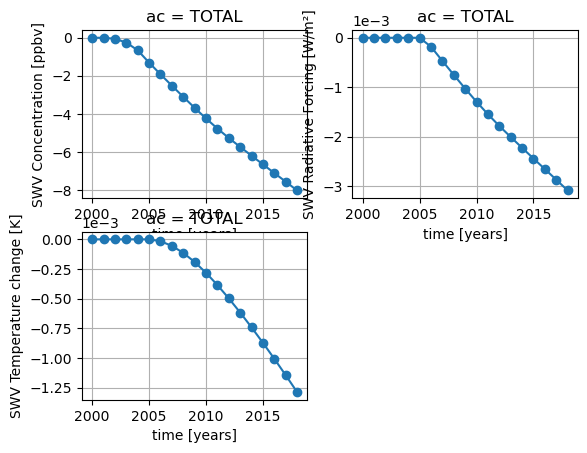

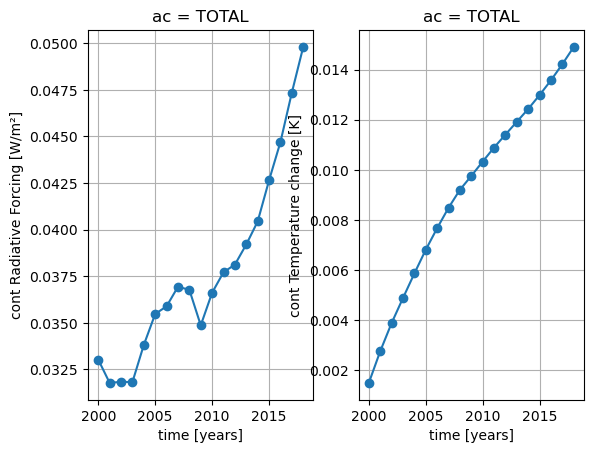

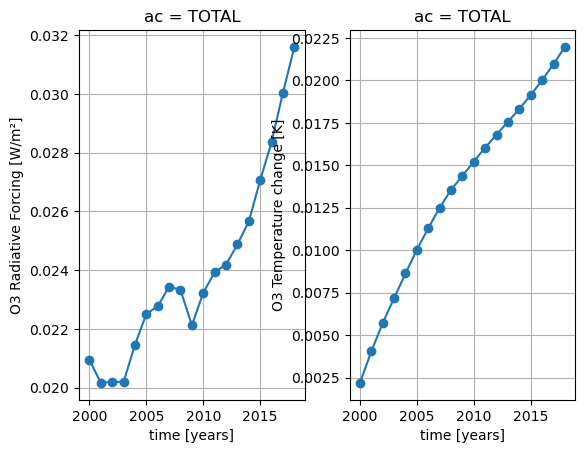

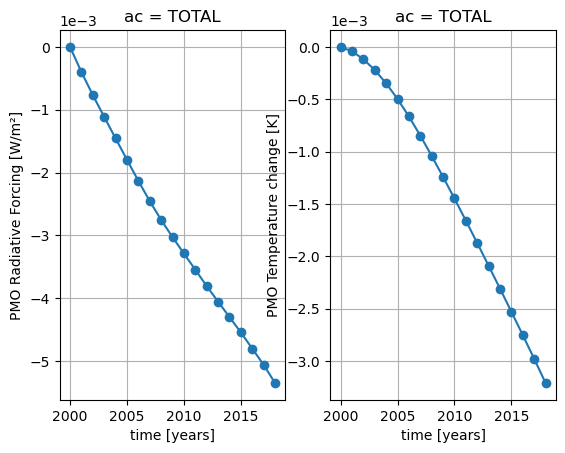

In [7]:

# if you have not added the oac folder to your PATH, then you also need to
# import sys and append to PATH using sys.path.append(`.../oac`)
import os
import openairclim as oac
import sys
import numpy as np

sys.path.append("../../openairclim")


# change directory to match current file
# os.chdir(os.path.dirname(os.path.abspath(__file__)))

oac.run(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\VandV\Lee.toml")


In [8]:
"""Write an additional DEPA file with the right year"""
import xarray as xr
ds = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2020_DEPA.nc")
display(ds)
# ds.attrs['Inventory_Year'] =np.int32(2000)
# display(ds)
# ds.to_netcdf(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2000_DEPA.nc")

<xarray.Dataset> Size: 24MB
Dimensions:   (index: 606169)
Coordinates:
  * index     (index) int64 5MB 0 1 2 3 4 ... 606164 606165 606166 606167 606168
Data variables:
    lon       (index) float32 2MB 125.0 37.0 58.0 152.0 ... 20.0 233.0 233.0
    lat       (index) float32 2MB 36.0 1.0 51.0 60.0 ... 57.0 33.0 66.0 66.0
    plev      (index) float32 2MB 506.3 217.3 239.1 572.1 ... 275.1 275.1 275.1
    fuel      (index) float32 2MB 2.427e+06 8.688e+05 ... 4.581e+04 4.581e+04
    CO2       (index) float32 2MB 7.56e+06 2.706e+06 ... 1.427e+05 1.427e+05
    H2O       (index) float32 2MB 3.034e+06 1.086e+06 ... 5.726e+04 5.726e+04
    NOx       (index) float32 2MB 5.578e+04 9.834e+03 3.897e+03 ... 467.1 467.1
    distance  (index) float32 2MB 4.889e+05 1.996e+05 ... 4.345e+03 4.345e+03
Attributes:
    Title:           inventory_example
    Convention:      CF-XXX
    Inventory_Year:  2020
    Reference:       Based on DEPA 2050 data
    URL:             https://elib.dlr.de/142185/

In [9]:
"""Postprocessing"""
import xarray as xr
data = xr.load_dataset(r"results_Lee/Lee.nc")
data

<xarray.Dataset> Size: 7kB
Dimensions:        (ac: 2, time: 19)
Coordinates:
  * time           (time) int64 152B 2000 2001 2002 2003 ... 2015 2016 2017 2018
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/21)
    emis_CO2       (ac, time) float64 304B 685.5 659.4 660.7 ... 982.6 1.034e+03
    emis_distance  (ac, time) float64 304B 3.029e+10 3.049e+10 ... 6.133e+10
    emis_H2O       (ac, time) float64 304B 253.7 244.1 244.5 ... 363.7 382.5
    emis_NOx       (ac, time) float64 304B 2.844 2.752 2.773 ... 4.473 4.705
    conc_CH4       (ac, time) float64 304B 0.0 -3.046 -5.853 ... -39.67 -42.1
    conc_CO2       (ac, time) float64 304B 0.08796 0.1678 0.2448 ... 1.468 1.57
    ...             ...
    dT_CO2         (ac, time) float64 304B 9.607e-05 0.0002677 ... 0.008734
    dT_cont        (ac, time) float64 304B 0.001484 0.002748 ... 0.01422 0.01491
    dT_H2O         (ac, time) float64 304B 0.0001787 0.0003309 ... 0.001796
    dT_O3          (ac, time) float64 304B 0.002186 0.004048 ... 0.02096 0.02197
    dT_PMO         (ac, time) float64 304B 0.0 -4.168e-05 ... -0.00298 -0.003211
    dT_SWV         (ac, time) float64 304B 0.0 0.0 0.0 ... -0.001146 -0.001288
Attributes:
    title:        Lee
    created:      2025-11-19 16:21:24
    user:         atzeh
    oac version:  0.11.1

In [10]:
species = ["H2O", "CO2", "CH4", "SWV"]
ERF_df

,Year,CO2,O3_short,CH4,O3_long,SWV,net_NOx,BC,SO4,H2O,cont_dist
0,2000,21.77,29.81,-11.81,-5.91,-1.77,12.17,0.62,-4.92,1.31,28.35
1,2001,22.41,28.84,-11.49,-5.74,-1.72,11.69,0.60,-4.74,1.26,28.54
2,2002,23.02,29.07,-11.64,-5.82,-1.75,11.69,0.60,-4.75,1.27,27.83
3,2003,23.61,29.21,-11.76,-5.88,-1.76,11.66,0.60,-4.74,1.27,28.98
4,2004,24.27,31.23,-12.64,-6.32,-1.90,12.36,0.64,-5.04,1.35,32.87
5,2005,24.97,32.95,-13.41,-6.71,-2.01,12.92,0.67,-5.29,1.41,34.76
6,2006,25.66,33.77,-13.81,-6.90,-2.07,13.14,0.68,-5.35,1.43,36.20
7,2007,26.39,35.20,-14.46,-7.23,-2.17,13.58,0.70,-5.51,1.47,38.12
8,2008,27.07,35.48,-14.64,-7.32,-2.20,13.59,0.69,-5.48,1.46,39.03
9,2009,27.69,34.08,-14.13,-7.06,-2.12,12.94,0.66,-5.20,1.39,38.04


In [11]:
data['RF_SWV'][0].values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.000182  , -0.00046887, -0.00075136, -0.00102843,
       -0.00129564, -0.00154828, -0.00178475, -0.00200824, -0.0022269 ,
       -0.00244364, -0.00265808, -0.00287222, -0.00309032])

H2O
{'H2O': array([1.31, 1.26, 1.27, 1.27, 1.35, 1.41, 1.43, 1.47, 1.46, 1.39, 1.46,
       1.5 , 1.52, 1.56, 1.61, 1.7 , 1.78, 1.88, 1.98])}
CO2
{'H2O': array([1.31, 1.26, 1.27, 1.27, 1.35, 1.41, 1.43, 1.47, 1.46, 1.39, 1.46,
       1.5 , 1.52, 1.56, 1.61, 1.7 , 1.78, 1.88, 1.98]), 'CO2': array([21.77, 22.41, 23.02, 23.61, 24.27, 24.97, 25.66, 26.39, 27.07,
       27.69, 28.33, 29.01, 29.68, 30.36, 31.08, 31.85, 32.62, 33.46,
       34.33])}
CH4
{'H2O': array([1.31, 1.26, 1.27, 1.27, 1.35, 1.41, 1.43, 1.47, 1.46, 1.39, 1.46,
       1.5 , 1.52, 1.56, 1.61, 1.7 , 1.78, 1.88, 1.98]), 'CO2': array([21.77, 22.41, 23.02, 23.61, 24.27, 24.97, 25.66, 26.39, 27.07,
       27.69, 28.33, 29.01, 29.68, 30.36, 31.08, 31.85, 32.62, 33.46,
       34.33]), 'CH4': array([ -9.97850267,  -9.70812834,  -9.83486631,  -9.93625668,
       -10.6797861 , -11.33037433, -11.66834225, -12.21754011,
       -12.36962567, -11.93871658, -12.75828877, -13.35818182,
       -13.55251337, -13.99187166, -14.49037433, -15

{'H2O': array([1.31, 1.26, 1.27, 1.27, 1.35, 1.41, 1.43, 1.47, 1.46, 1.39, 1.46,
        1.5 , 1.52, 1.56, 1.61, 1.7 , 1.78, 1.88, 1.98]),
 'CO2': array([21.77, 22.41, 23.02, 23.61, 24.27, 24.97, 25.66, 26.39, 27.07,
        27.69, 28.33, 29.01, 29.68, 30.36, 31.08, 31.85, 32.62, 33.46,
        34.33]),
 'CH4': array([ -9.97850267,  -9.70812834,  -9.83486631,  -9.93625668,
        -10.6797861 , -11.33037433, -11.66834225, -12.21754011,
        -12.36962567, -11.93871658, -12.75828877, -13.35818182,
        -13.55251337, -13.99187166, -14.49037433, -15.33529412,
        -16.03657754, -16.9828877 , -17.87005348]),
 'SWV': array([-1.51714286, -1.47428571, -1.5       , -1.50857143, -1.62857143,
        -1.72285714, -1.77428571, -1.86      , -1.88571429, -1.81714286,
        -1.93714286, -2.03142857, -2.06571429, -2.12571429, -2.20285714,
        -2.33142857, -2.44285714, -2.58857143, -2.71714286])}

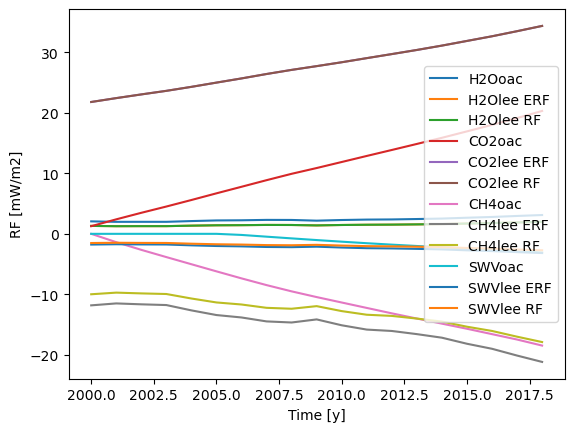

In [12]:
time = ERF_df['Year'].values
#TODO this is comparing RF with ERF
# the ERF is calculated by lee as a sensitivity RF/m_N, a emissin m_N and a transient, if i repalce the sensitivity for ERF with that for RF the numbers will be allright, these are constant over time for swv it is -2.4, not -2.8

lee_RF ={}

for spec in species:
    print(spec)
    oac = data[f'RF_{spec}'][0].values*1000
    lee = ERF_df[spec].values
    if spec == "H2O":
        lee_RF[spec] = ERF_df[spec].values    
    if spec == "CO2":
        lee_RF[spec] = ERF_df[spec].values    
    if spec == "CH4":
        lee_RF[spec] = ERF_df[spec].values/18.7*15.8  
    if spec == "SWV":
        lee_RF[spec] = ERF_df[spec].values/2.8*2.4      
    # print(len(oac))
    # print(len(lee))
    # print("\n\n\n")
    plt.plot(time, oac, label =spec +'oac')
    plt.plot(time, lee, label =spec +'lee ERF')
    plt.plot(time, lee_RF[spec], label =spec +'lee RF')
    plt.xlabel('Time [y]')
    plt.ylabel('RF [mW/m2]')
    plt.legend()
    # plt.show()
    print(lee_RF)
    
lee_RF

In [13]:
lee_2018 = {'SWV':-2.7, 'CO2':34.3, 'CH4':-17.9, 'H2O':2, "cont":111.4, 'O3':36, 'PMO':-9} #mW/m2
lee_2018_low = {'SWV':-5, 'CO2':31, 'CH4':-33.6, 'H2O':0.8, "cont":33, 'O3':23, 'PMO':-16.8} #mW/m2
lee_2018_high = {'SWV':-1.9, 'CO2':38, 'CH4':-12.5, 'H2O':3.2, "cont":189, 'O3':55.8, 'PMO':-6.3} #mW/m2
oac_norm = {}
for spec in lee_2018.keys():
    print(spec, lee_2018[spec], data['RF_'+spec][0].values[-1]*1000)
    #Normalize:
    lee_2018_low[spec] = lee_2018_low[spec]/lee_2018[spec]
    lee_2018_high[spec] = lee_2018_high[spec]/lee_2018[spec]
    oac_norm[spec] = data['RF_'+spec][0].values[-1]*1000/lee_2018[spec]
    lee_2018[spec] = lee_2018[spec]/lee_2018[spec]

SWV -2.7 -3.090318490106143
CO2 34.3 20.291825895493627
CH4 -17.9 -18.45068761182397
H2O 2 3.1042113646737683
cont 111.4 49.80314393266841
O3 36 31.597860137117877
PMO -9 -5.350699407428952


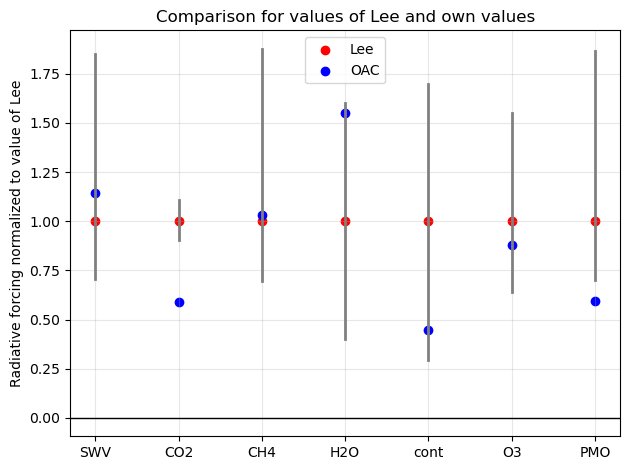

In [14]:
# lee_2018_low.pop('CO2') # TODO as CO2 has a different base
species = lee_2018_low.keys()
central = [lee_2018[s] for s in species]
low = [lee_2018_low[s] for s in species]
high = [lee_2018_high[s] for s in species]
# data_oac = [data['RF_'+s][0].values[-1]*1000 for s in species]
data_oac = [oac_norm[s] for s in species]

for i, s in enumerate(species):
    plt.plot([i, i], [low[i], high[i]], color='gray', lw=2)
# Plot central points
plt.scatter(range(len(species)), central, color='red', label='Lee')
plt.scatter(range(len(species)), data_oac, color='blue', label='OAC')

# Format plot
plt.xticks(range(len(species)), species)
plt.ylabel("Radiative forcing normalized to value of Lee") # (mW/m²)
plt.title("Comparison for values of Lee and own values")
plt.axhline(0, color='black', lw=1)
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
[data['RF_'+spec][0].values[-1]*1000 for spec in species]

[np.float64(-3.090318490106143),
 np.float64(20.291825895493627),
 np.float64(-18.45068761182397),
 np.float64(3.1042113646737683),
 np.float64(49.80314393266841),
 np.float64(31.597860137117877),
 np.float64(-5.350699407428952)]

In [16]:
species

dict_keys(['SWV', 'CO2', 'CH4', 'H2O', 'cont', 'O3', 'PMO'])

In [17]:
# for spec in ['SWV', 'CH4']:
#     oac_RF = data['RF_'+spec][0].values*1000
#     
lee_rela = lee_RF['SWV']/lee_RF['CH4']
oac_rela =[]
for i in range(len(data['RF_'+'SWV'][0].values)):
    if data['RF_'+'CH4'][0].values[i] != 0:
        oac_rela.append(data['RF_'+'SWV'][0].values[i]/data['RF_'+'CH4'][0].values[i])
    else:
        oac_rela.append(np.nan)
        
    
oac_rela

[nan,
 np.float64(-0.0),
 np.float64(-0.0),
 np.float64(-0.0),
 np.float64(-0.0),
 np.float64(-0.0),
 np.float64(0.024745207239914437),
 np.float64(0.05538278605986234),
 np.float64(0.07910649905371764),
 np.float64(0.09847756286171583),
 np.float64(0.11425978778366803),
 np.float64(0.1265487488292851),
 np.float64(0.1359401244576951),
 np.float64(0.14357679678159957),
 np.float64(0.15016110735280805),
 np.float64(0.15589552227944262),
 np.float64(0.16048909664093491),
 np.float64(0.16457359302969604),
 np.float64(0.16749069493354482)]

[nan, np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(0.024745207239914437), np.float64(0.05538278605986234), np.float64(0.07910649905371764), np.float64(0.09847756286171583), np.float64(0.11425978778366803), np.float64(0.1265487488292851), np.float64(0.1359401244576951), np.float64(0.14357679678159957), np.float64(0.15016110735280805), np.float64(0.15589552227944262), np.float64(0.16048909664093491), np.float64(0.16457359302969604), np.float64(0.16749069493354482)]
[0.15204113 0.15186096 0.1525186  0.15182493 0.15249102 0.15205651
 0.15205979 0.15224014 0.15244716 0.15220588 0.15183407 0.15207373
 0.15242297 0.15192494 0.1520221  0.15203025 0.15233033 0.15242234
 0.15205007]


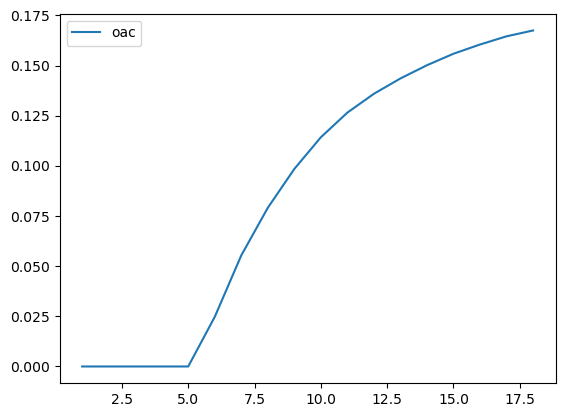

In [18]:
print(oac_rela)
print(lee_rela)
plt.plot(np.arange(len(oac_rela)), oac_rela, label='oac')
# plt.plot(time, lee_rela, label='lee')
plt.legend()
plt.show()

In [19]:
np.arange(2020,2051,1)

array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
       2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [20]:
metric = xr.load_dataset(r"results_Lee/Lee_metrics.nc")
metric

<xarray.Dataset> Size: 9kB
Dimensions:        (species: 8)
Coordinates:
  * species        (species) <U5 160B 'CH4' 'CO2' 'cont' ... 'PMO' 'SWV' 'total'
Data variables: (12/279)
    AGWP_10_1990   (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGWP_20_1990   (species) float32 32B -0.05484 0.06131 ... -0.002431 0.5688
    AGWP_100_1990  (species) float32 32B -0.1885 0.2049 ... -0.02236 1.159
    AGWP_10_2000   (species) float32 32B -0.05484 0.06131 ... -0.002431 0.5688
    AGWP_20_2000   (species) float32 32B -0.1885 0.2049 ... -0.02236 1.159
    AGWP_100_2000  (species) float32 32B -0.1885 0.2049 ... -0.02236 1.159
    ...             ...
    AGTP_10_2049   (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGTP_20_2049   (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGTP_100_2049  (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGTP_10_2050   (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGTP_20_2050   (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
    AGTP_100_2050  (species) float32 32B 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    Title:    Lee climate metrics

In [21]:
np.arange(2000,2101,1)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054,
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100])